# Project 1 - Testing a Perceptual Phenomenon
#### By Ryan Cunningham

## Background Information
In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

## Questions for Investigation
**1. What is our independent variable? What is our dependent variable?**

Our independent variable is the congruence between font color and the word itself, a variable we will designate as "Congruence."

The dependent variable is the time it takes for a test participant to read, which we can designate "Reading Time."

**2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.**

One set of hypotheses that we can draw for this task is as follows: test participants should, when reading incongruent words, demonstrate significantly slower reading speeds than participants that read congruent words. Where µ represents the mean congruent pair reading time for a population, and µ0 represents the mean incongruent pair reading time:
* Null: µ >= µ0, the mean reading time for incongruent pairs is either the same or less than that of congruent pairs
* Alternative: µ < µ0, the mean reading time for incongruent pairs is significantly greater than that of congruent pairs

The reason for these hypotheses is to determine if incongruence between text and font color has a demonstrable effect on increasing mean reading times, due to the faster processing time it would take a participant to analyze the text.

Since we have Stroop test results for n=25 people, and no information on the reading population as a whole, I propose we conduct a t-test to draw inferences about the population. Assuming that our sample test results are normally distributed, a one-sided t-test should do the trick, since we our hypotheses only concerns a one-directional relationship between the independent and dependent variables (incongruent pairs are associated with increased reading times).

### Before we go any further, let's load the data in from the CSV

In [86]:
import unicodecsv

def readcsv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

reading_times = readcsv('stroopdata.csv')
reading_times[0]

{u'Congruent': u'12.079', u'Incongruent': u'19.278'}

### But we notice that the reading times for each dataset are included as unicode. Let's convert those datatypes into floats

In [87]:
def parse(i):
    if i == '':
        return None
    else:
        return float(i)

### And now we'll convert the datasets into separate lists

In [88]:
from collections import defaultdict

def group_data(data, key_name):
    grouped_data = []
    for data_point in data:
        grouped_data.append(parse(data_point[key_name]))
    return grouped_data

congruent_reading_times = group_data(reading_times, 'Congruent')
incongruent_reading_times = group_data(reading_times, 'Incongruent')

print congruent_reading_times[0]
print incongruent_reading_times[0]

12.079
19.278


**3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.**

### Now let's describe the data in a bit more detail

In [89]:
import numpy as np

def describe_data(data, title):
    print title+" Descriptive Statistics"
    print '----------------------------------'
    print 'Mean:', np.mean(data)
    print 'Standard deviation:', np.std(data)
    print 'Minimum:', np.min(data)
    print 'Maximum:', np.max(data)
    print ''

describe_data(congruent_reading_times, "Congruent Reading Times")
describe_data(incongruent_reading_times, "Incongruent Reading Times")

Congruent Reading Times Descriptive Statistics
----------------------------------
Mean: 14.051125
Standard deviation: 3.48441571277
Minimum: 8.63
Maximum: 22.328

Incongruent Reading Times Descriptive Statistics
----------------------------------
Mean: 22.0159166667
Standard deviation: 4.69605513451
Minimum: 15.687
Maximum: 35.255



**4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.**

We'll have to start this by importing matplotlib, a Python data visualization library. From there we'll create separate distributions curves for the Congruent and Incongruent datasets

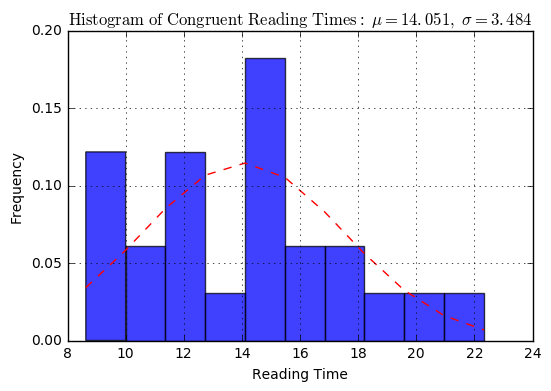

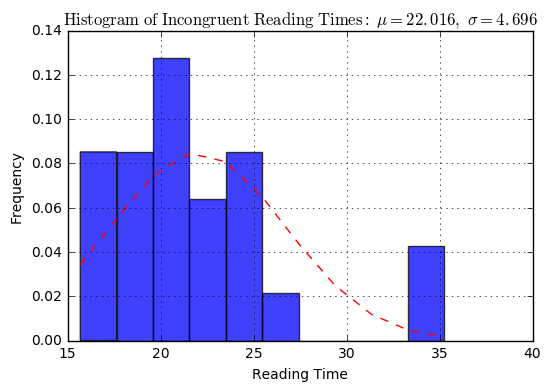

In [90]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

def histogram(data, title):
    mu, sigma = np.mean(data), np.std(data)
    x = mu + sigma*np.random.randn(10000)
    
    # the histogram of the data
    n, bins, patches = plt.hist(data,10,normed=1, alpha=0.75)
    
    # add a 'best fit' line
    y = mlab.normpdf(bins, mu, sigma)
    l = plt.plot(bins, y, 'r--', linewidth=1)
    
    plt.xlabel('Reading Time')
    plt.ylabel('Frequency')
    plt.title(r'$\mathrm{Histogram\ of\ %s:}\ \mu=%.3f,\ \sigma=%.3f$' %(title, mu, sigma))
    plt.grid(True)
    plt.show()

histogram(congruent_reading_times, "Congruent\ Reading\ Times")
histogram(incongruent_reading_times, "Incongruent\ Reading\ Times")

We can make the following observations about the distribution curves:
1. Participants that were reading incongruent word-color pairs, on average, took longer to read than participants reading congruent word-color pairs.
2. Incongruent word-color pair reading times were more variable than congruent word-color pair reading times.
3. Both distributions appear to be skewed to the right, wherein most of the mass under the curve is on the left side of the x-axis.
    
Seeing as these are two limited samples, I'd recommend using a one-sided t-test to determine if there is a statistically significant relationship between incongruence and longer reading times.

**5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?**

In [91]:
import scipy.stats as sp

# Collecting the variables necessary for the t-test
mu = np.mean(congruent_reading_times)
mu_sub_zero = np.mean(incongruent_reading_times)
sigma = np.std(incongruent_reading_times)
n = len(incongruent_reading_times)

print "t-test Inputs"
print '----------------------------------'
print 'Population Mean: %0.3f' % mu
print 'Sample Mean: %0.3f' % mu_sub_zero
print 'Standard deviation: %0.3f' % sigma
print 'n:', n
print ''

# Calculating the t-statistic and p-value
t = (mu - mu_sub_zero)/(sigma/np.sqrt(n))
pval = sp.t.sf(np.abs(t), n-1)*2

print "t-test Results"
print '----------------------------------'
print 't-statistic: %0.3f ' % t
print 'p-value: %.4f' % pval

# Determining statistical significant
alpha = 0.01
if pval < alpha:
    print 'At an alpha-level of %.2f, the difference between the means is statistically significant' % (alpha)
else:
    print 'At an alpha-level of %.2f, the difference between the means is not statistically significant' % (alpha)

t-test Inputs
----------------------------------
Population Mean: 14.051
Sample Mean: 22.016
Standard deviation: 4.696
n: 24

t-test Results
----------------------------------
t-statistic: -8.309 
p-value: 0.0000
At an alpha-level of 0.01, the difference between the means is statistically significant


When measuring the difference between our incongruent pair reading times and congruent pair reading times, we found that it took on average appx. 8 seconds longer for a participant to read incongruent pairs.

After running our t-test we found a very large t-statistic with a very small p-value. With a 99% confidence interval, we'd require our resultant p-value to be smaller than 1% in order to prove statistical significance. Since p-value is much smaller than our required threshold, we can say that this experiment provides sufficient evidence to reject our null hypothesis.

Therefore, we can conclude that in this experiment, there is evidence of causality between incongruent word-color pairs and increased reading times for our participants.

Based on my experience with the Stroop task, these results met my expectations.

**6. Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!**

Perhaps the same center of the brain used for interpreting visual cues is also used for interpreting written language, and thus operates quickly when the two are in concert with one another (congruent pairs), while two separate interpretation tasks must be performed when visual and written cues are at odds (incongruent pairs). The additional processing time could be what's causing the significant difference in mean reading time.

We could conduct a similar study in which incongruent pairs of numbers and their symbols are displayed to the participants. Or animal names and their images.

## Sources
1. Chudler, Eric, "Interactive Stroop Effect Experiment," https://faculty.washington.edu/chudler/java/ready.html, Accessed 12/5/2016